In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
plt.rcParams['figure.figsize']=14,6

In [2]:
def conv2d(input_matrix, kernel,same=False):
    output = np.zeros([input_matrix.shape[0]+kernel.shape[0]-1, input_matrix.shape[1]+kernel.shape[1]-1])
    #Rotating kernel by 180
    rotated_kernel = np.zeros(kernel.shape)
    for i in range(kernel.shape[0]):
        for j in range(kernel.shape[1]):
            rotated_kernel[i][j] = kernel[kernel.shape[0]-1-i][kernel.shape[1]-1-j]
    
    padded_img = np.zeros([input_matrix.shape[0] + 4, input_matrix.shape[1] + 4])
    padded_img[2:2+input_matrix.shape[0], 2:2+input_matrix.shape[1]] = input_matrix
    
    for centre_row in range(output.shape[0]):
        for centre_col in range(output.shape[1]):
            padding_submat = padded_img[centre_row:kernel.shape[0]+centre_row, centre_col:kernel.shape[1]+centre_col]
            product = rotated_kernel.flatten().dot(padding_submat.flatten())
            output[centre_row][centre_col] = product
            
    if same==True:
        limit_row=output.shape[0]-input_matrix.shape[0]
        limit_col=output.shape[1]-input_matrix.shape[1]
        output=output[limit_row-1:output.shape[0]-limit_row+1,limit_col-1:output.shape[1]-limit_col+1]
        
    return output

#Testing the conv function
kernel=np.array([[0,1,0],[1,-4,1],[0,1,0]])
input_img=np.array([[6,7],[8,9]])
conv_output=conv2d(input_img,kernel)
print("\nThe convoluted output is:")
print(conv_output)
print("\n")


The convoluted output is:
[[  0.   6.   7.   0.]
 [  6.  -9. -13.   7.]
 [  8. -17. -21.   9.]
 [  0.   8.   9.   0.]]





The values in filter/kernel w(x,y) are
[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]




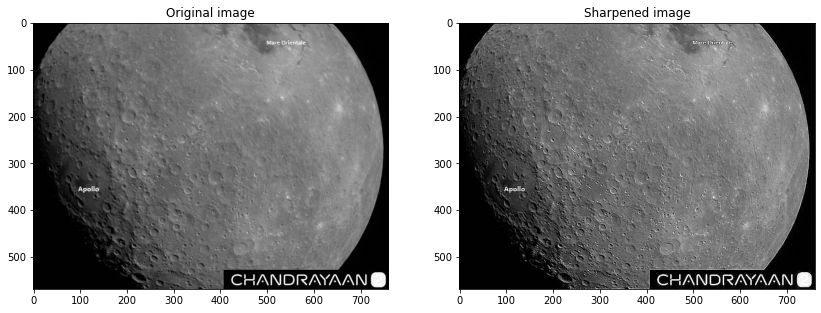

In [3]:
img=plt.input_img = cv2.imread('input_img.jpg', cv2.IMREAD_GRAYSCALE)
w_xy=np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
print("\nThe values in filter/kernel w(x,y) are")
print(w_xy)
print("\n")

sharpened_img = conv2d(img, w_xy, True)
#Normalizing the pixel values
sharpened_img[sharpened_img>255]=255
sharpened_img[sharpened_img<0]=0
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title('Original image')
plt.subplot(1,2,2)
plt.imshow(sharpened_img,cmap='gray')
plt.title('Sharpened image')
plt.show()